# 数据展示及可视化
## 1. 数据可视化的重要性
## 2. 基本图表的绘制及应用场景
## 3. 数据分析常用图标的绘制
## 4. Pandas及Seaborn绘图
## 5. 其他常用的可视化工具
----

### 1.数据可视化准则
- #### 真实性(Truthful)
- #### 功能性(Functionality)
- #### 美观(Beauty)
- #### 深刻性(Insightful)
- #### 启发性(Enlightening)

In [1]:
import matplotlib
import seaborn as sns
import numpy as np     #和notebook交互的语言，目的是将图打印出来
%matplotlib inline  

In [2]:
anscombe_df = sns.load_dataset('anscombe')
anscombe_df.head(10)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
anscombe_df.groupby('dataset').agg([np.mean, np.var])  #var是样本方差

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

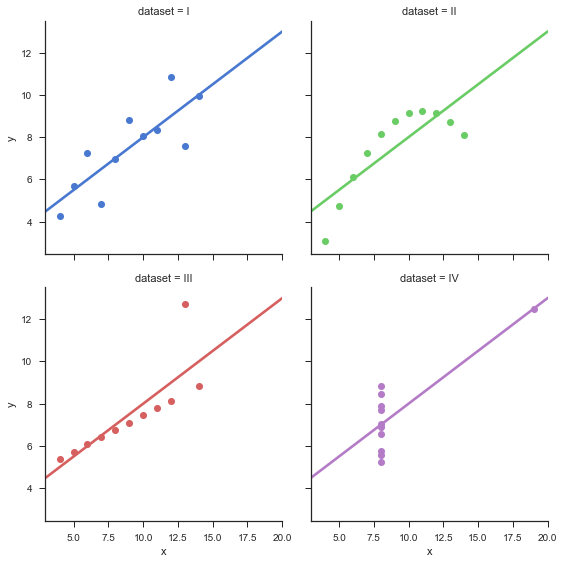

In [4]:
sns.set(style="ticks")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", 
           data=anscombe_df, col_wrap=2, ci=None, palette="muted", 
           size=4, scatter_kws={"s": 50, "alpha": 1})                    ##从这里的数据可以看出，可视化的重要性，数据是不一样的，虽然他们的mean和var都一样
                                                                        ## 统计特性不一定能完全反应数据的特性

## 2. 基本图表的绘制及应用场景

### 2.1 Matplotlib
- 用于创建出版质量图表的绘图工具库
- 目的是为Python构建一个Matlab式的绘图接口
- import matplotlib.pyplot as plt
 - pyplot模块包含了常用的matplotlib API函数

### Matplotlib构架
- Backend层
 - 用于处理向屏幕或文件渲染图形
 - 在Jupyter，使用inline backend
 - [什么是backend](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend)
- Artist层
 - 包含图像绘制的容器，如Figure，Subplot及Axes
 - 包含基本元素，如Line2D，Rectangle等
- Scripting层
 - 简化访问Artist和Backend层的过程

In [5]:
# 用于在jupyter中进行绘图
#%matplotlib notebook　　　　　#非嵌入的图片 #嵌入图片见下面
%matplotlib inline             

In [6]:
# Backend

import matplotlib as mpl
mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

### 使用[matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html)直接绘制

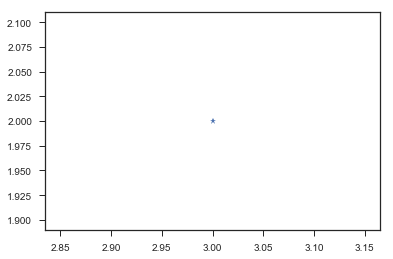

In [7]:
import matplotlib.pyplot as plt
plt.plot(3, 2,'*')                        #需要指定mark               

In [8]:
#使用scripting层绘制
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3, 2, '.')
canvas.print_png('test.png')  ##保存图片

### pyplot
- [pyplot](https://matplotlib.org/users/pyplot_tutorial.html)
- 可通过gcf(get current figure)获取当前图像对象，gca(get current axis)获取当前坐标轴对象
- 可以通过pyplot.plot()进行绘图，其底层调用的还是axes.plot()函数
- 多参考相关的API文档

[0, 6, 0, 10]

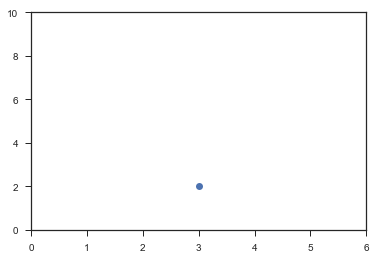

In [9]:
#gca获取当前坐标对象
plt.figure()
plt.plot(3, 2, 'o')
ax = plt.gca()      #获取当前坐标轴
# 设置坐标轴范围
ax.axis([0, 6, 0, 10])

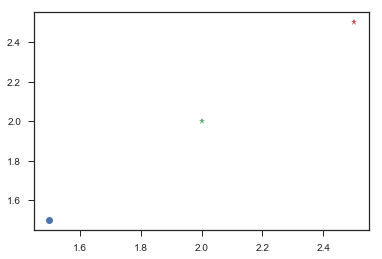

In [10]:
# matplot 会自动用颜色区分不同的数据
plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, '*')
plt.plot(2.5, 2.5, '*')

### 2.2 散点图
- plt.scatter()
- [scatter_API](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.scatter)
- zip封装及解包
- 坐标标签plt.xlabel(),plt.ylabel()，标题plt.title()，图例plt.legend()
- 颜色、标记、线性
 - axplot(x,y,'r--') 等价于ax.plot(x,y,linestyle = '--',color = 'r')

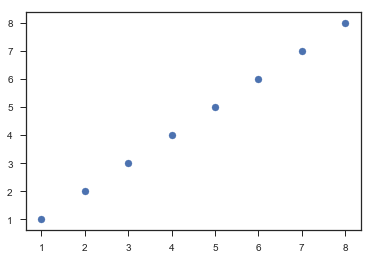

In [11]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()
plt.scatter(x, y)

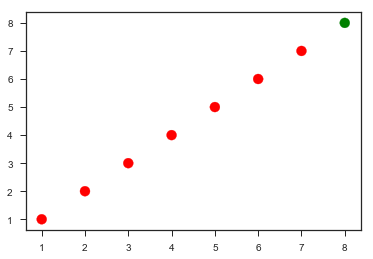

In [12]:
# 改变颜色及大小

import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x
colors = ['red'] * (len(x) - 1)
colors.append('green')

plt.figure()
plt.scatter(x, y, s=100, c=colors)

In [13]:
# 使用zip合并两个列表为一个新列表
# 新列表中的每个元素为对应位置上的元组
l1 = list(range(1, 6))
l2 = list(range(6, 11))
zip_generator = zip(l1, l2) #生成器
tuple_list = list(zip_generator)
print(type(zip_generator))
print(list(tuple_list))

<class 'zip'>
[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


In [14]:
# 使用*进行对元组列表解包
x, y = zip(*tuple_list)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


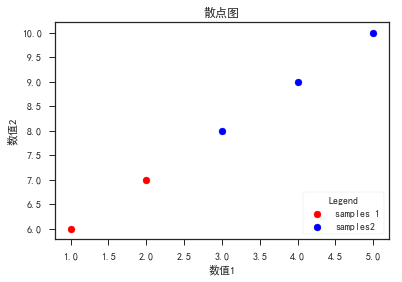

In [15]:
plt.figure()
plt.scatter(x[:2], y[:2], c='red', label='samples 1')
plt.scatter(x[2:], y[2:], c='blue', label='samples2')

# 添加坐标标签，标题，如果用中文需要加下面的中文设置代码
plt.xlabel('数值1')
plt.ylabel('数值2')
plt.title('散点图')

# 添加图例
# plt.legend()
# 4: 右下角  
plt.legend(loc=4, frameon=True, title='Legend') #frameon指是否加边框，best是最佳位置

plt.rcParams["font.sans-serif"] = ["SimHei"] #设置中文字符，如果不加这行，只能用英文

### 2.3 线图
- plt.plot()
- 填充线间的区域
 - plt.gca().fill_between()
- np.array()生成时间数据
 - np.array('2017-01-01,'2017-01-08',dtype = 'datetime64[D]')
- 绘制图像的坐标轴为时间数据时，可以借助pandas的to_datetime()完成
- 旋转坐标轴文字的方向
 - plt.xticks(rotation = )或遍历ticks进行set_rotation()
- 调整边界距离，plt.subplots_adjust()
- [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot)

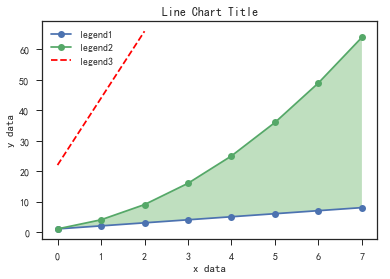

In [16]:
import numpy as np

linear_data = np.arange(1, 9)
quadratic_data = linear_data ** 2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

# 注意，这里我们只指定了y轴数据，x轴的数据是matplotlib自动生成的

plt.plot([22, 44, 66], '--r')

# 添加坐标轴标签及图例
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Line Chart Title')
plt.legend(['legend1', 'legend2', 'legend3'])

# 填充两个line间的区域
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data,
                      facecolor='green',
                      alpha=0.25)

plt.savefig("examples.jpg")    #保存图片##

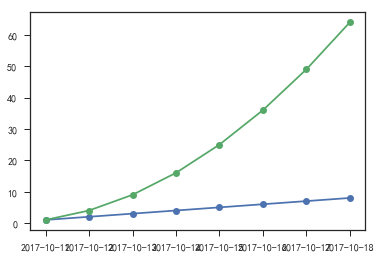

In [17]:
# 绘制横轴为时间的线图
plt.figure()
observation_dates = np.arange('2017-10-11', '2017-10-19', dtype='datetime64[D]')
observation_dates
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')
# 横轴并不是我们想要的结果

Text(0.5,1,'Quadratic ($x^2$) vs. Linear ($x$)')

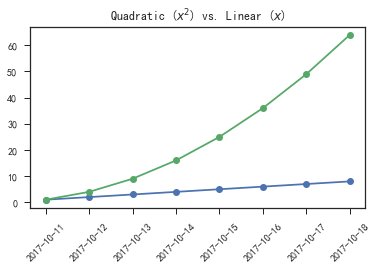

In [18]:
# 借助pandas绘制横轴为时间的线图
import pandas as pd
plt.figure()
observation_dates = np.arange('2017-10-11', '2017-10-19', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

# plt.xticks(rotation='45')        #用这个比较好，转角45度
x = plt.gca().xaxis 
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# 调整边界距离
plt.subplots_adjust(bottom=0.25)

# 对于学术制图，可在标题中包含latex语法
ax = plt.gca()
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$)')

### 2.4 柱状图
- plt.bar()
- group bar chart
 - 同一副图中包含多个柱状图时，注意要对x轴的数据做相应的移动，避免柱状图重叠
 - stack bar chart
  - 使用bottom参数
 - 横向柱状图
  - barh
  - 相应的参数width变为参数height；bottom变为left

<BarContainer object of 8 artists>

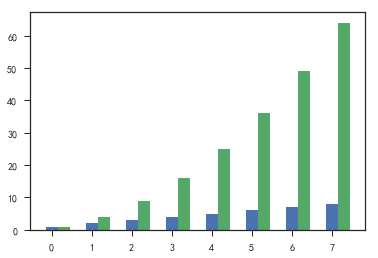

In [19]:
plt.figure()
x_vals = list(range(len(linear_data)))
plt.bar(x_vals, linear_data, width=0.3)

# group bar chart
# 同一副图中添加新的柱状图
# 注意，为了不覆盖第一个柱状图，需要对x轴做偏移，必须通过偏移来完成
x_vals2 = [item + 0.3 for item in x_vals]
plt.bar(x_vals2, quadratic_data, width=0.3)  


<BarContainer object of 8 artists>

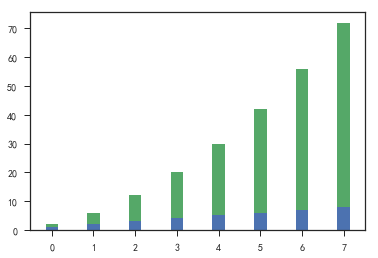

In [20]:
# stack bar chart
plt.figure()
x_vals = list(range(len(linear_data)))
plt.bar(x_vals, linear_data, width=0.3)
plt.bar(x_vals, quadratic_data, width=0.3, bottom=linear_data)

<BarContainer object of 8 artists>

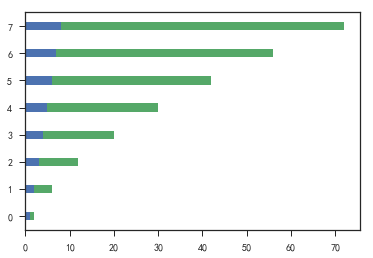

In [21]:
# 横向柱状图
plt.figure()
x_vals = list(range(len(linear_data)))
plt.barh(x_vals, linear_data, height=0.3)
plt.barh(x_vals, quadratic_data, height=0.3, left=linear_data)

## 2.5 应用场景
- 散点图，适用于二维或三维数据集，但其中只有两维需要比较
- 线图，适用于二维数据集，适合进行趋势的比较
- 柱状图，适用于二维数据集，但只有一个维度需要比较，利用柱子的高度反映数据的差异

## 3. 数据分析常用图标的绘制

### 3.1 Subplots
- plt.subplots() 建立子图
- [subplot_api](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots)

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


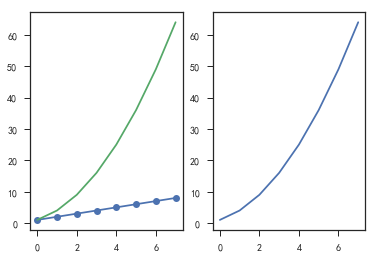

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure()
# 表示1行2列，现在在第一个子图上进行操作
plt.subplot(1, 2, 1)

linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')

#在第二个子图上画图
exponential_data = linear_data ** 2
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-x')

plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

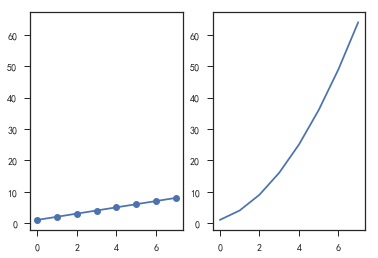

In [23]:
# 保证子图中坐标范围一致
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1) 
plt.plot(exponential_data, '-x')

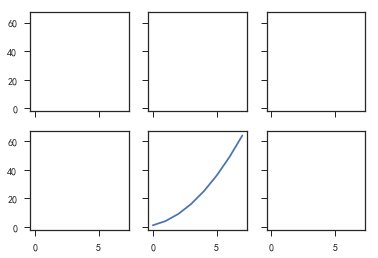

In [24]:
#建子图
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,
                                                      sharex=True, sharey=True)
ax5.plot(exponential_data, '-')

### 3.2 直方图
- 对数据分布情况的图表示
- 首先要对数据进行分组，然后统计每个分组内数据的数量
- 作用：
 - 显示各分组频率或数量分布的情况
 - 易于显示各组之间频率或数量的差别
- plt.hist(data,bins)
  
  data:数据列表
  
  bins:分组边界或分组个数
- [直方图_api](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20hist#matplotlib.pyplot.hist)

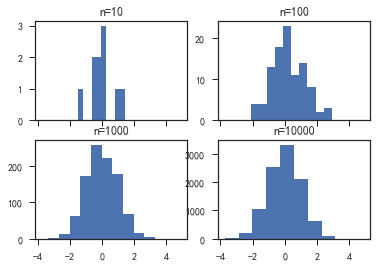

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # 默认bin的个数为10
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


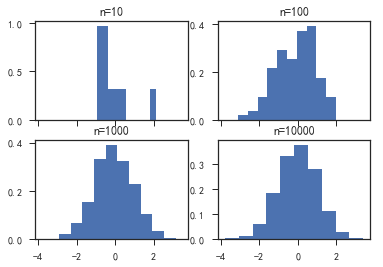

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # bin设为100
    #axs[n].hist(sample, bins=100)  
    axs[n].hist(sample,normed = True) #normed是归一化
    axs[n].set_title('n={}'.format(sample_size))

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


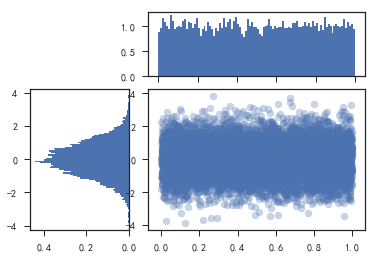

In [27]:
# 使用gridspec和直方图绘制一个复杂分析图
import matplotlib.gridspec as gridspec

x = np.random.random(size=10000)
y = np.random.normal(loc=0., scale=1., size=10000)

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_hist = plt.subplot(gspec[0, 1:])
side_hist = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(x, y,alpha = 0.3 )  #alpha是透明度
top_hist.hist(x, bins=100, normed=True)
side_hist.hist(y, bins=100, orientation='horizontal', normed=True)
side_hist.invert_xaxis()

### 3.3 盒形图
- [详细说明](http://support.sas.com/documentation/cdl_alternate/zh/vaug/67500/HTML/default/n0kzo3n26iuhvhn1c1u3hwwa2qtt.htm)
- plt.boxplot()
 - whis默认为1.5启用离群值；'range'为不启用离群值
- [盒形图_api](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [28]:
import pandas as pd
# 正态分布采样
normal_sample = np.random.normal(loc=0., scale=1., size=10000)
# 随机数采样
random_sample = np.random.random(size=10000)
# gamma分布采样
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [29]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.976661,0.003610,0.501369
std,1.414204,0.995286,0.287917
min,0.007872,-3.657963,0.000222
25%,0.948101,-0.663987,0.253921
50%,1.653653,0.002788,0.500607
75%,2.646682,0.673119,0.750561
max,14.901529,3.746122,0.999764


{'whiskers': [<matplotlib.lines.Line2D at 0x20b1d531fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20b1d537a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b1d531e10>],
 'medians': [<matplotlib.lines.Line2D at 0x20b1d53d390>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b1d53d828>],
 'means': []}

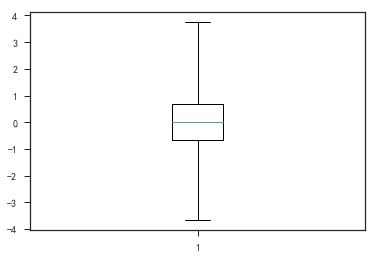

In [30]:
plt.figure()
plt.boxplot(df['normal'], whis='range')

{'whiskers': [<matplotlib.lines.Line2D at 0x20b1d58b978>,
 'caps': [<matplotlib.lines.Line2D at 0x20b1d5943c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b1d58b7b8>,
 'medians': [<matplotlib.lines.Line2D at 0x20b1d594cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x20b1d59d1d0>,
 'means': []}

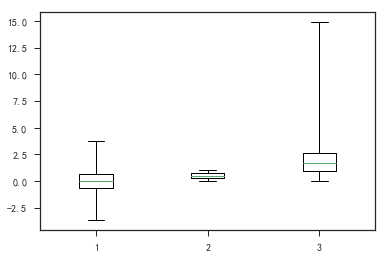

In [31]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

{'whiskers': [<matplotlib.lines.Line2D at 0x20b1d614908>,
 'caps': [<matplotlib.lines.Line2D at 0x20b1d61b358>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b1d614748>,
 'medians': [<matplotlib.lines.Line2D at 0x20b1d61bc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x20b1d64d160>,
 'means': []}

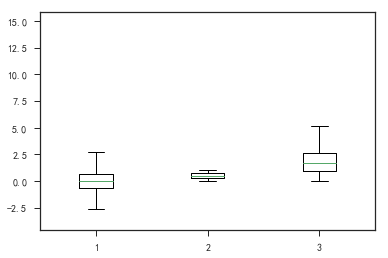

In [32]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']])

### 3.4 热图
- [热图_api](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist2d.html?highlight=matplotlib%20axes%20axes%20hist2d#matplotlib.axes.Axes.hist2d)
- 可用于三维数据的可视化
- plt.imshow(arr)
- plt.hist2d()
- plt.colorbar()添加颜色条

(array([[  0.,   0.,   0.,   0.,   0.,   4.,   8.,  12.,  29.,  26.,  41.,
          51.,  52.,  40.,  37.,  49.,  22.,  15.,   8.,   4.,   1.,   1.,
           0.,   1.,   0.],
        [  0.,   1.,   0.,   0.,   5.,   3.,   7.,  18.,  27.,  32.,  38.,
          54.,  44.,  45.,  38.,  23.,  30.,  11.,   4.,   4.,   0.,   1.,
           0.,   0.,   0.],
        [  0.,   0.,   1.,   3.,   1.,   7.,  10.,  18.,  29.,  24.,  35.,
          43.,  50.,  50.,  36.,  28.,  25.,  16.,   3.,   5.,   1.,   1.,
           0.,   1.,   0.],
        [  0.,   0.,   1.,   1.,   5.,   4.,  12.,  15.,  19.,  35.,  39.,
          32.,  55.,  51.,  44.,  24.,  23.,  13.,   8.,   5.,   0.,   1.,
           0.,   0.,   0.],
        [  0.,   1.,   0.,   2.,   1.,   6.,   6.,  14.,  28.,  33.,  46.,
          43.,  44.,  40.,  45.,  26.,  17.,  20.,   6.,   5.,   5.,   0.,
           1.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   3.,   8.,   9.,  17.,  25.,  45.,  31.,
          46.,  63.,  44.,  33.,  1

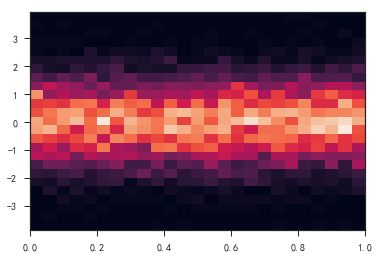

In [33]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=25)



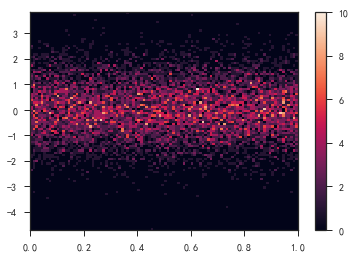

In [34]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=100)

plt.colorbar()

## 4. Pandas及Seaborn绘图

### 4.1 Pandas
- df.plot(kind = )
 - kind用于指定绘图的类型
- pd.plotting.scatter_matrix()
- pd.plotting.parrallel_coordinates()
- [dataframe绘图](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
# panda绘图，可用的绘图样式 
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [37]:
# 设置绘图样式
plt.style.use('seaborn-colorblind')

In [38]:
#dataframe绘图
np.random.seed(100)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                  'B': np.random.randn(365).cumsum(0) + 20,
                  'C': np.random.randn(365).cumsum(0) - 20},
                 index=pd.date_range('2017/1/1', periods=365))
df.head()

,A,B,C
2017-01-01,-1.749765,21.091816,-19.638975
2017-01-02,-1.407085,20.686733,-17.061997
2017-01-03,-0.254049,21.223177,-15.474676
2017-01-04,-0.506485,19.091862,-14.786998
2017-01-05,0.474835,19.354939,-14.805210


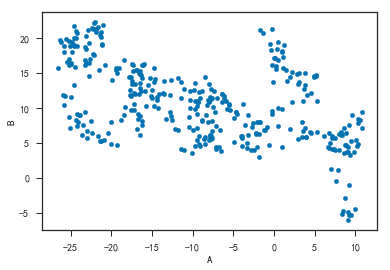

In [39]:
df.plot('A', 'B', kind='scatter')

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


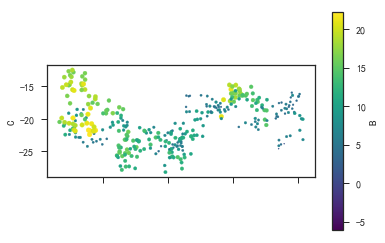

In [40]:
# 颜色(c)和大小(s)有'B'列的数据决定
ax = df.plot('A', 'C', kind='scatter',
        c='B', s=df['B'], colormap='viridis')

# 设置坐标为相同比例
ax.set_aspect('equal')

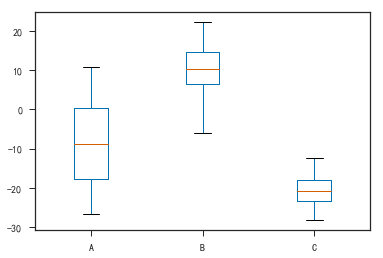

In [41]:
df.plot(kind='box') 

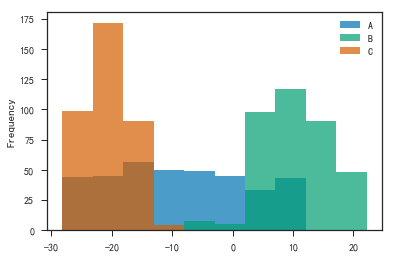

In [42]:
df.plot(kind='hist', alpha=0.7)

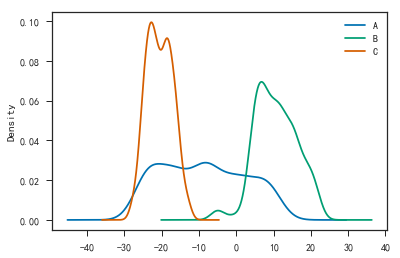

In [43]:
df.plot(kind='kde') #拟合分布图

In [44]:
#pandas.tools.plotting
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B1D85F0F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020B1DB7CAC8>]], dtype=object)

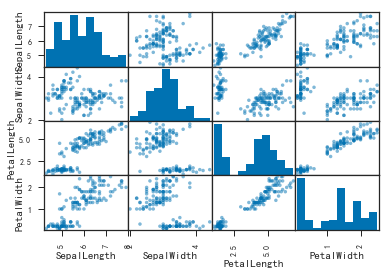

In [45]:
# 用于查看变量间的关系
pd.plotting.scatter_matrix(iris)  #每俩俩之间的关系

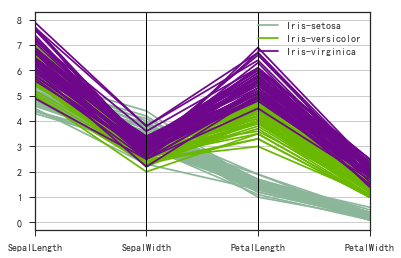

In [46]:
# 用于查看多遍量分布
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name')  #平行坐标

### 4.2 Seaborn
- 一个制图工具库，可以制作出吸引人的，信息量大的统计图
- 在Matplotlib上构建，支持numpy和pandas的数据结构可视化，甚至是scipy和statsmodels的统计模型可视化


### 特点：
- 多个内置主题和颜色主题
- 可视化单一变量、二维变量用于比较数据集中各变量的分布情况
- 可视化线性回归模型中的独立变量及不独立变量
- 可视化矩阵数据，通过聚类算法探究矩阵间的结构
- 可视化时间序列数据及不确定性的展示
- 可在分各区域制图，用于复杂的可视化

### 安装：
- conda install seaborn
- pip install seaborn

### 数据集分布可视化
- 单变量分布 sns.ditplot()
 - 直方图 sns.distplot(kde = False)
 - 核密度估计 sns.distplot(hist = False)或sns.kdeplot()
 - 拟合参数分布 sns.distplot(kde = False,fit = )

- 双变量分布
 - 散布图 sns.joinplot()
 - 二维直方图 Hexbin.sns.jointplot(kind = 'hex')
 - 核密度估计 sns.jointplot(kind = 'kde')

### 类别数据可视化
- 类别散布图
 - sns.stripplot() 数据点会重叠
 - sns.swarmplot() 数据点避免重叠
 - hue指定子类别
- 类别内数据分布
 - 盒子图 sns.boxplot,hue指定子类别
 - 小提琴图 sns.violinplot(), hue指定子类别
- 类别内统计图
 - 柱状图 sns.barplot()
 - 点图 sns.pointplot()

- 类别内统计图

In [47]:
#导入seaborn工具
import seaborn as sns

In [48]:
np.random.seed(100)
v1 = pd.Series(np.random.normal(0, 10, 1000), name='v1')
v2 = pd.Series(2 * v1 + np.random.normal(60, 15, 1000), name='v2')

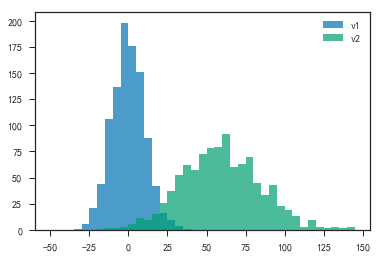

In [49]:
# 通过matplotlib绘图
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50, 150, 5), label='v1')
plt.hist(v2, alpha=0.7, bins=np.arange(-50, 150, 5), label='v2')
plt.legend()

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


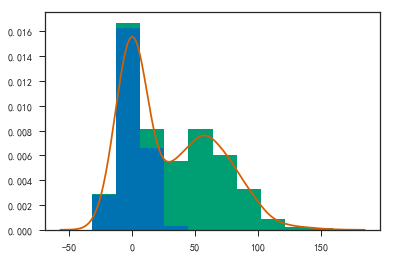

In [50]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True)
v3 = np.concatenate((v1, v2))
sns.kdeplot(v3)

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


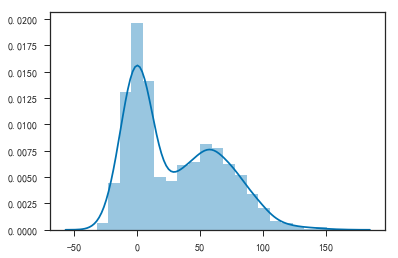

In [51]:
# 使用seaborn绘图
plt.figure()
sns.distplot(v3)

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

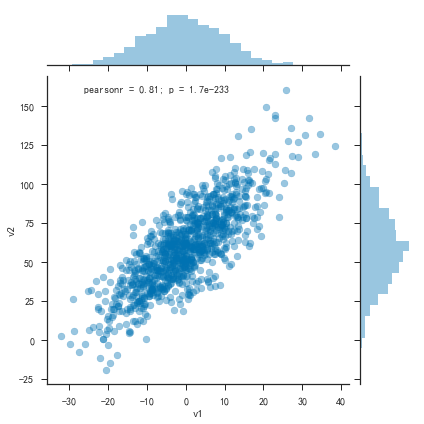

In [52]:
# 使用seaborn绘图
plt.figure()
sns.jointplot(v1, v2, alpha=0.4)

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

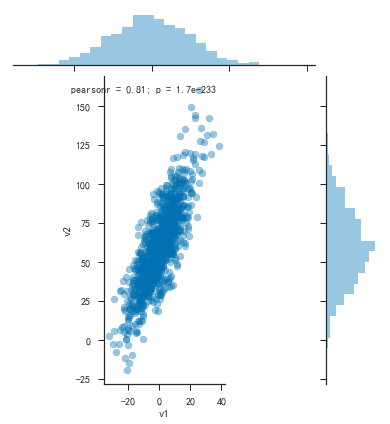

In [53]:
# 使用seaborn绘图
plt.figure()
grid = sns.jointplot(v1, v2, alpha=0.4)
grid.ax_joint.set_aspect('equal')

E:\Anaconda2\envs\bunnies\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

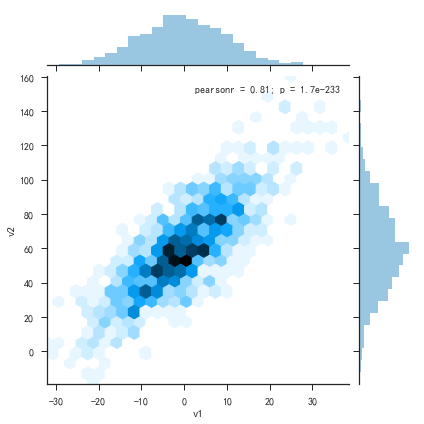

In [54]:
plt.figure()
sns.jointplot(v1, v2, kind='hex')

<Figure size 432x288 with 0 Axes>

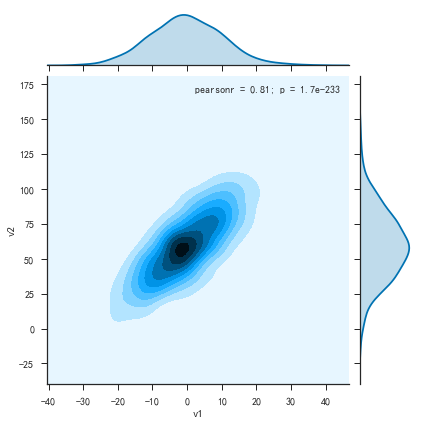

In [55]:
plt.figure()
sns.jointplot(v1, v2, kind='kde')  #kde是密度曲线

In [56]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


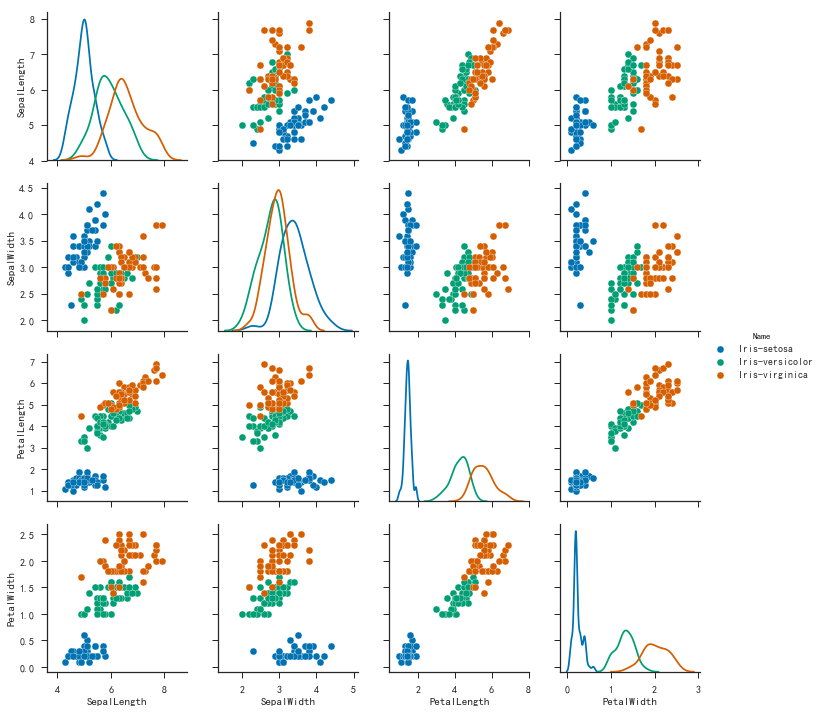

In [57]:
sns.pairplot(iris, hue='Name', diag_kind='kde')

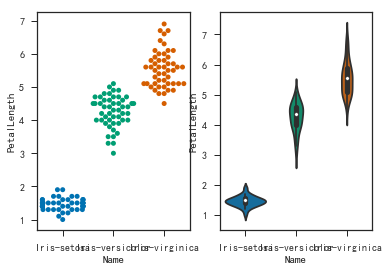

In [58]:
plt.figure()
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris)
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris)

## 5. 其他常用的可视化工具（可交互）

### 5.1 D3.js
- D3(Data- Driven Documents),是一个用动态图形显示数据的JavaScript库，一个可视化工具
- mpld3
- [参考链接](http://mpld3.github.io/)
- pip install mpld3

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
##交互式图例
import mpld3
from mpld3 import plugins

In [61]:
np.random.seed(100)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                  'B': np.random.randn(365).cumsum(0) + 20,
                  'C': np.random.randn(365).cumsum(0) - 20},
                 index=range(365))
df.head()

,A,B,C
0,-1.749765,21.091816,-19.638975
1,-1.407085,20.686733,-17.061997
2,-0.254049,21.223177,-15.474676
3,-0.506485,19.091862,-14.786998
4,0.474835,19.354939,-14.805210


In [62]:
df.columns.values

array(['A', 'B', 'C'], dtype=object)

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
labels = df.columns.tolist()
lines = ax.plot(df.index.values, df.values, lw=2)
interactive_legend = plugins.InteractiveLegendPlugin(lines, labels)
plugins.connect(fig, interactive_legend)

mpld3.display()

In [64]:
#图像保存成html
with open('./interactive_legend_eg.html', 'w') as f:
    mpld3.save_html(fig, f)

### 5.2 echarts
- 一个纯Javascript的图标库，可以流畅的运行在PC和移动设备上，兼容当前绝大部分浏览器，底层依赖轻量级的Canvas类库ZRender，提供直观，生动，可交互，可高度个性化定制的数据可视化图标。
- pyecharts
 - [参考链接](http://pyecharts.org/#/zh-cn/)
 - pip install pyecharts
 - [详细用法](http://pyecharts.org/#/zh-cn/prepare)
 - 与Python进行对接，方便在Python中直接使用数据生成图

In [65]:
#柱状图交互式图例
from pyecharts import Bar

comp_df = pd.read_csv('./comparison_result.csv', index_col='state')
comp_df

,beijing_CH,beijing_US,chengdu_CH,chengdu_US,guangzhou_CH,guangzhou_US,shanghai_CH,shanghai_US,shenyang_CH,shenyang_US
state,,,,,,,,,,
good,213,205,196,111,351,376,340,375,207,205
heavy,140,144,111,118,4,7,36,28,79,89
light,291,299,441,480,441,412,480,489,385,388
medium,286,282,281,320,124,125,220,184,256,245


In [66]:
good_state_results = comp_df.iloc[0, :].values
heavy_state_results = comp_df.iloc[1, :].values
light_state_results = comp_df.iloc[2, :].values
medium_state_results = comp_df.iloc[3, :].values

labels = comp_df.index.values.tolist()
city_names = comp_df.columns.tolist()

bar = Bar("堆叠柱状图")
bar.add('良好', city_names, good_state_results, is_stack=True, xaxis_interval=0, xaxis_rotate=30)
bar.add('轻度污染', city_names, light_state_results, is_stack=True, xaxis_interval=0, xaxis_rotate=30)
bar.add('中度污染', city_names, medium_state_results, is_stack=True, xaxis_interval=0, xaxis_rotate=30)
bar.add('重度污染', city_names, heavy_state_results, is_stack=True, xaxis_interval=0, xaxis_rotate=30)

bar

In [67]:
# 保存结果到html
bar.render('./echarts_demo.html')